
<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#9ba60a;">Regression+Feature exam for 30 marks

-----------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Problem statement

Since it is not specified in the Question, in this case study I am considering the Credit - `Balance` as the Dependent/Target variable.

In [3]:
target = 'Balance'

# 4 Questions X 2 Marks = 8 Marks

-----

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 1.Read the dataset?

In [4]:
df = pd.read_csv('Credit.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">2. Remove the column 'Unnamed'?

In [5]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">3.Replace the missing values with a appropriate method?

In [8]:
df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

There are no missing values so we can skip null value treatment

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">4. Check the descriptive statistics of the numerical columns?

In [9]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [10]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


-----------

# 5 Questions X 3 Marks = 15 Marks

----------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">1. Convert categorical features to numerical?


In [11]:
# Considering all the numerical columns except the target
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove(target)
num_cols

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [12]:
cat_cols = df.select_dtypes(exclude='number').columns
cat_cols

Index(['Gender', 'Student', 'Married', 'Ethnicity'], dtype='object')

In [13]:
df[cat_cols].nunique()

Gender       2
Student      2
Married      2
Ethnicity    3
dtype: int64

In [14]:
# Since the number of unique values is less we can go with One hot encoding
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">2A).Check the Relationship between dependent variables and independent variable,write your observation ?

Income skewness: 1.742117404958152
Limit skewness: 0.8374929007321962
Rating skewness: 0.8653935227370102
Cards skewness: 0.79192833408374
Age skewness: 0.011495909415831947
Education skewness: -0.32921176090512944


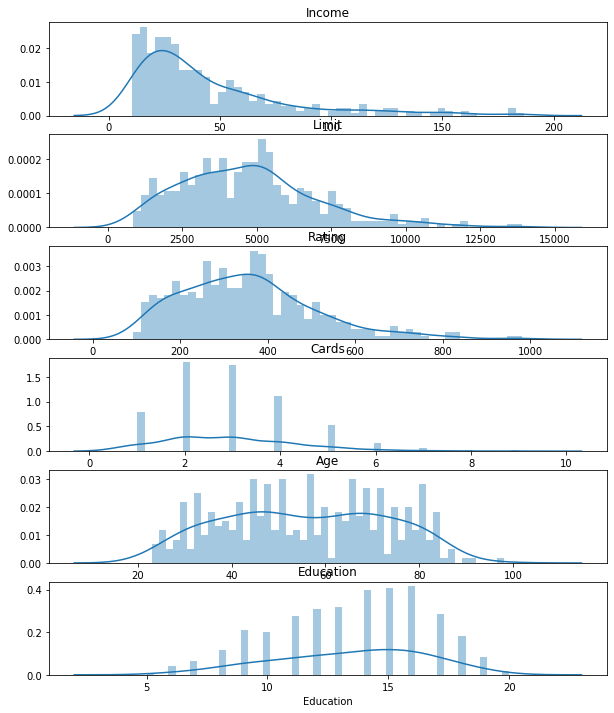

In [15]:
# EDA on continuous integer variables
plt.figure(figsize=(10,12))
for i,col in enumerate(num_cols,1):
    plt.subplot(6,1,i)
    print("{} skewness: {}".format(col,df[col].skew()))
    plt.title(col)
    ax = sns.distplot(df[col],bins=50)
plt.show()

Observation:
Except for `Age ` all the columns have some amount of skewness in them with the highest of them in 
`Income`.

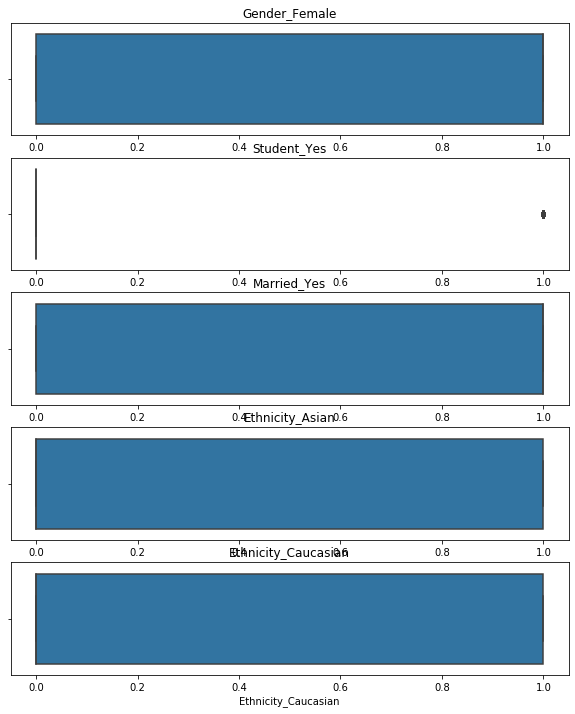

In [16]:
plt.figure(figsize=(10,12))
cat_cols = df.drop(columns=num_cols).columns.tolist()
cat_cols.remove(target)
n = len(cat_cols)
for i,col in enumerate(cat_cols,1):
    plt.subplot(n,1,i)
    plt.title(col)
    sns.boxplot(df[col])
    
plt.show()

In [25]:
for col in cat_cols:
    print(df[col].value_counts(normalize=True))

1    0.5175
0    0.4825
Name: Gender_Female, dtype: float64
0    0.9
1    0.1
Name: Student_Yes, dtype: float64
1    0.6125
0    0.3875
Name: Married_Yes, dtype: float64
0    0.745
1    0.255
Name: Ethnicity_Asian, dtype: float64
0    0.5025
1    0.4975
Name: Ethnicity_Caucasian, dtype: float64


Observations: No outlier are observed in the categorical columns.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">2B).Draw the pairplots and heatmaps and  write your observation?

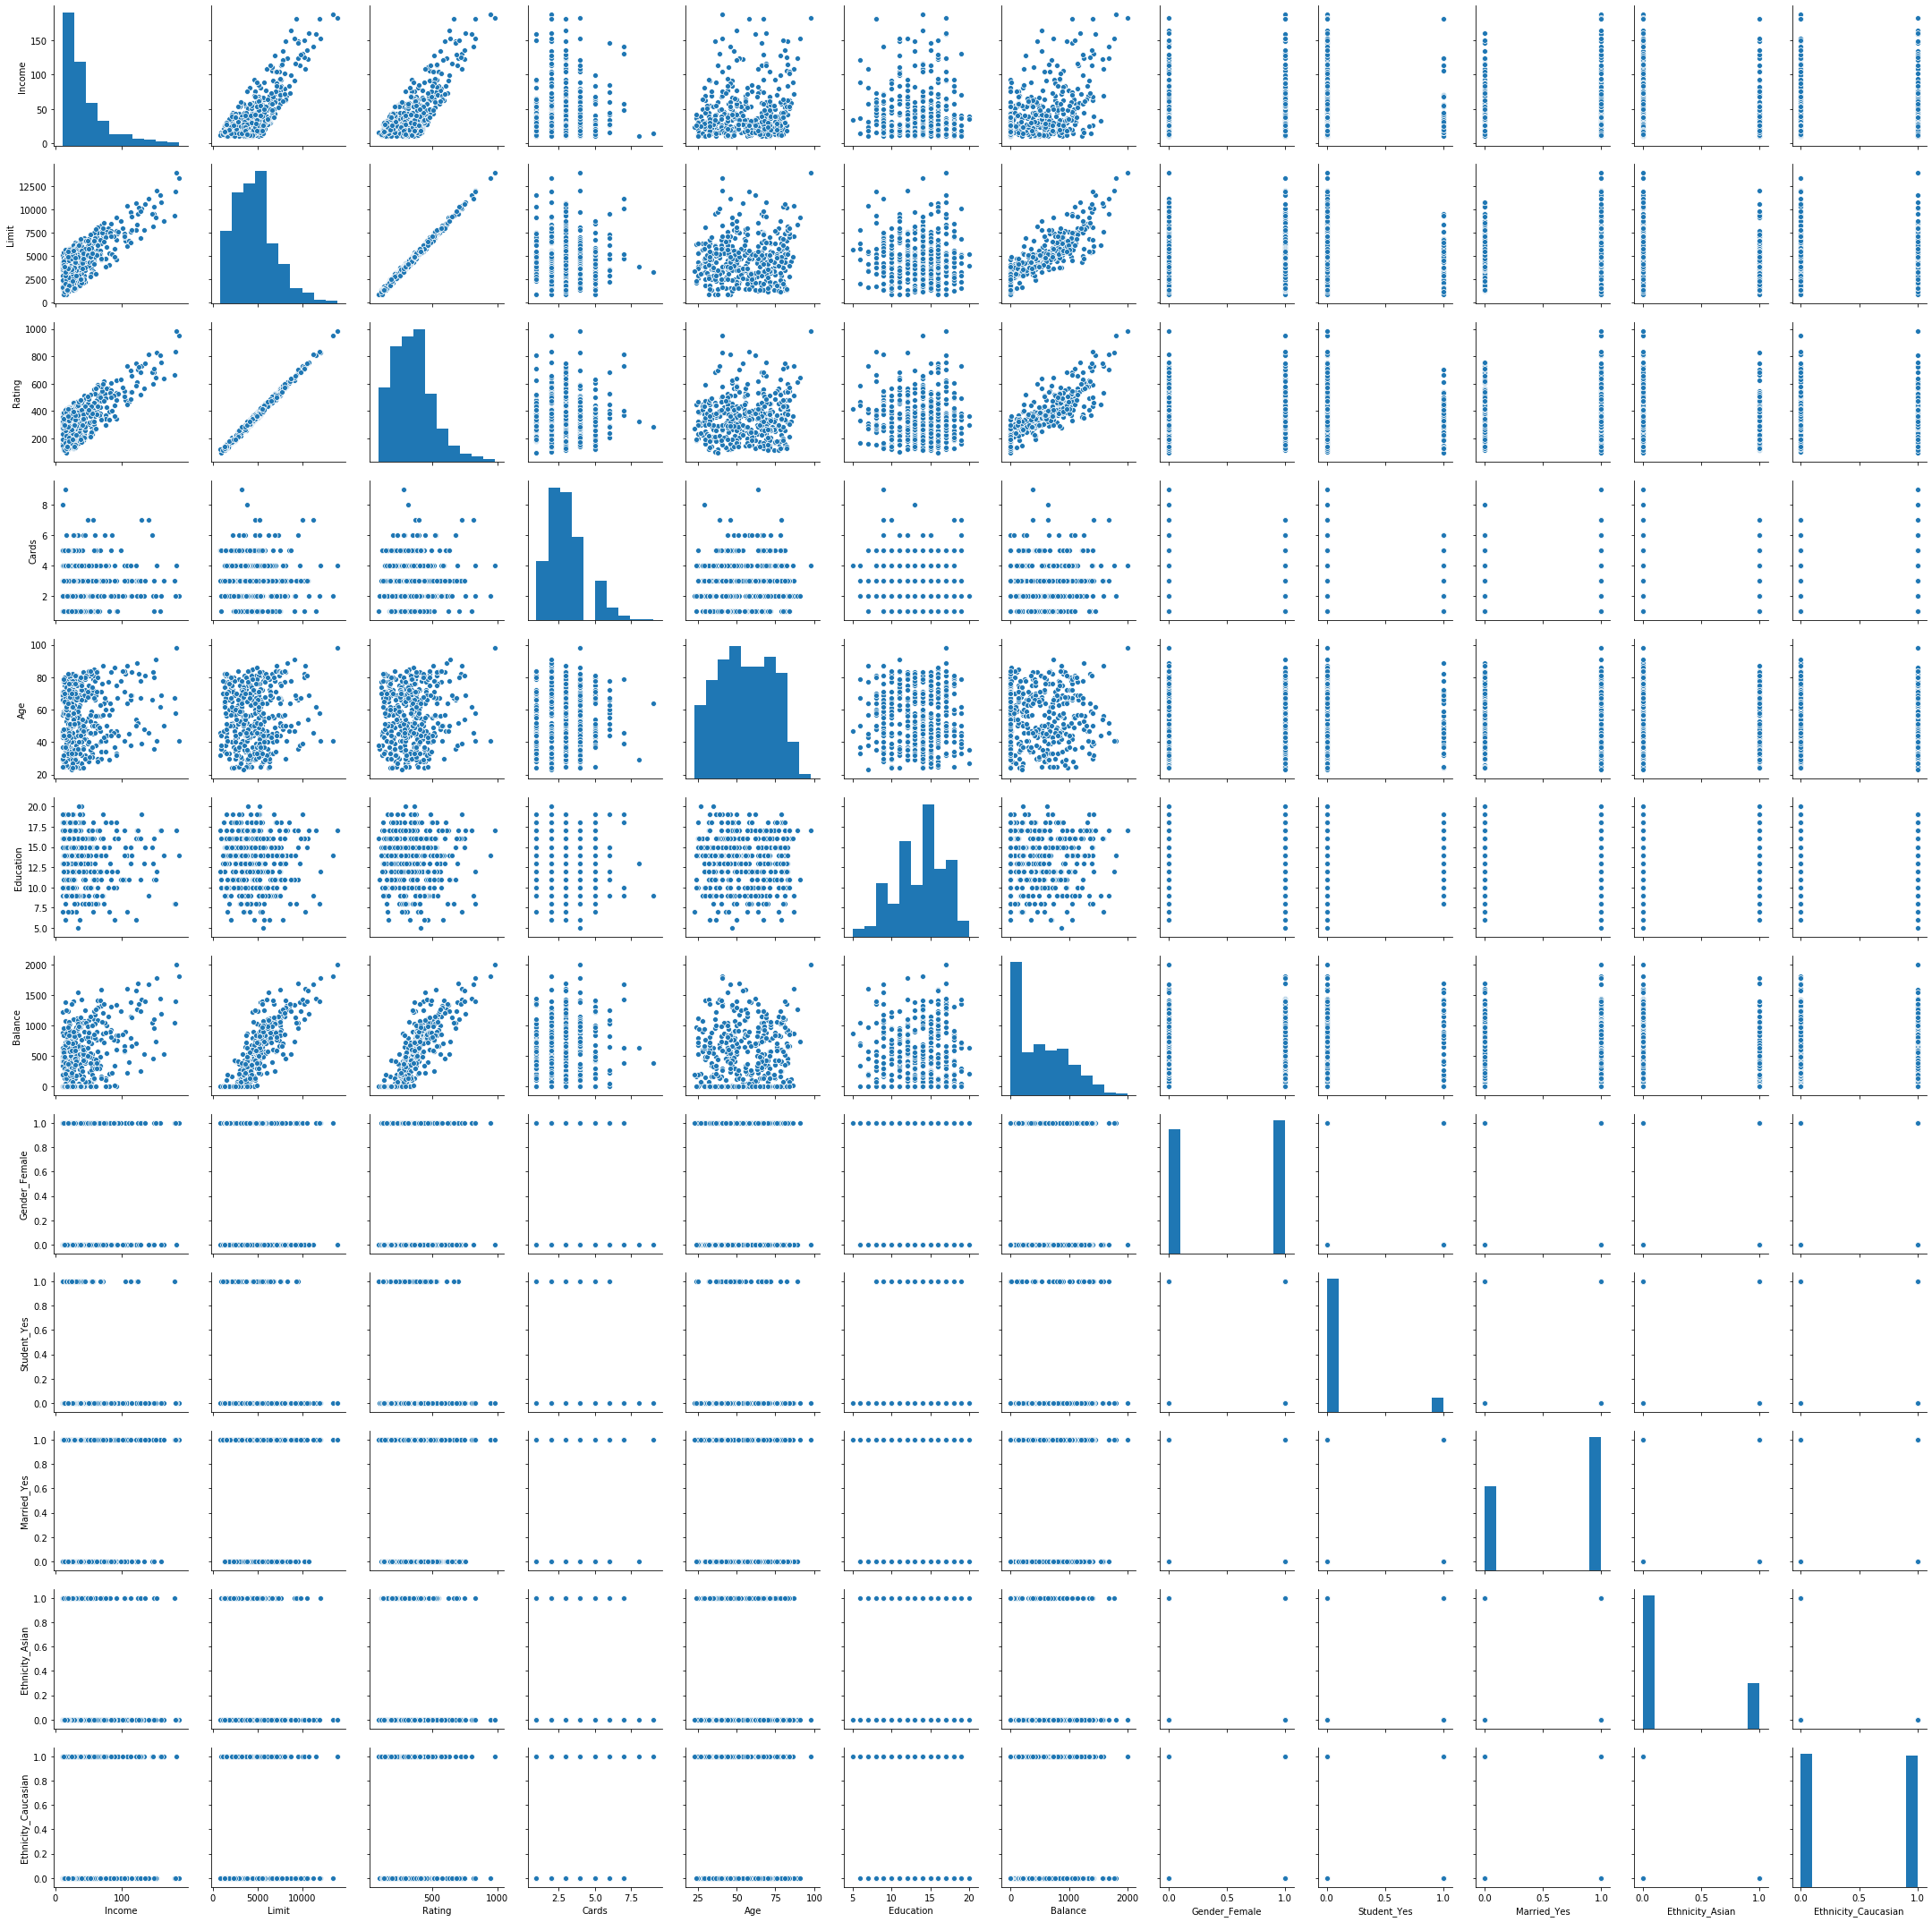

In [26]:
# Pairplot
sns.pairplot(df)
plt.show()

There are few features showing high correlation (exhibiting linear relationship) we willl confirm the presence using a correlation map.

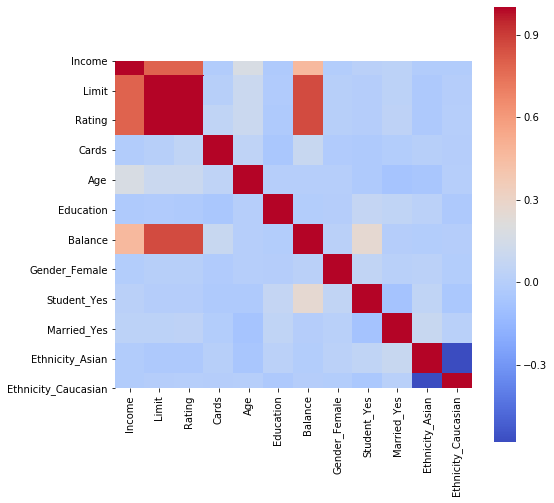

In [28]:
plt.rcParams['figure.figsize'] = 8,8
sns.heatmap(df.corr(),cmap='coolwarm',square=True)
plt.show()

Income, Limit and Rating are showing a high level of correlation with the target variable.

However multicollinearity is also observed among (Rating, Income) , (Limit, Income) and (Limit, Rating)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">3.Separate the independent and dependent variables?

In [30]:
X = df.drop(columns=[target])
y = df[target]
X.shape,X.columns

((400, 11), Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
        'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
        'Ethnicity_Caucasian'],
       dtype='object'))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">4. Split the data into train = 70% and test size = 30%?

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 11), (120, 11), (280,), (120,))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 5. Build Linear Regression model and Check the R^2 and Adjusted R^2?

In [40]:
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_constant).fit()
model.summary()

c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     497.9
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          2.69e-171
Time:                        11:58:25   Log-Likelihood:                -1681.3
No. Observations:                 280   AIC:                             3387.
Df Residuals:                     268   BIC:                             3430.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -452.4345     43.358    -10.435      0.000    -537.801    -367.068
Income                 -7.7136      0.279    -27.669      0.000      -8.263      -7.165
Limit                   0.2184      0.039      5.635      0.000       0.142       0.295
Rating                  0.6984      0.583      1.198      0.232      -0.449       1.846
Cards                  18.8088      5.170      3.638      0.000       8.629      28.988
Age                    -0.3765      0.355     -1.061      0.290      -1.075       0.322
Education              -1.7827      1.927     -0.925      0.356      -5.576       2.011
Gender_Female         -17.7674     12.159     -1.461      0.145     -41.707       6.172
Student_Yes           416.3355     18.862     22.073      0.000     379.200     453.471
Married_Yes            -8.3769     12.553     -0.667      0.505     -33.092      16.338
Ethnicity_Asian        13.6573     17.230      0.793      0.429     -20.266      47.581
Ethnicity_Caucasian     2.2068     15.083      0.146      0.884     -27.489      31.902
==============================================================================
Omnibus:                       20.496   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.376
Skew:                           0.707   Prob(JB):                     8.39e-06
Kurtosis:                       3.063   Cond. No.                     3.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Baseline model metrics
- R-square value : 0.954
- Adjusted R-square: 0.952

Our aim will be to achieve scores better than the base model.

In [43]:
# These are the values with high p-values and have a possibility to be dropped
# Let us check the corresponding VIFs
candidates = ['Education','Ethnicity_Caucasian','Married_Yes','Rating','Age','Gender_Female','Ethnicity_Asian']

----------

# 1 Questions X 7 Marks = 7 Marks

------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 1. Combine all the steps performed above and Check for Multi Collinearity and get the Final R^2,ADJR^2,RMSE?

## Check for multicollinearity 

WE can follow two methods for checking the multicollinearity

### Using correlation matrix

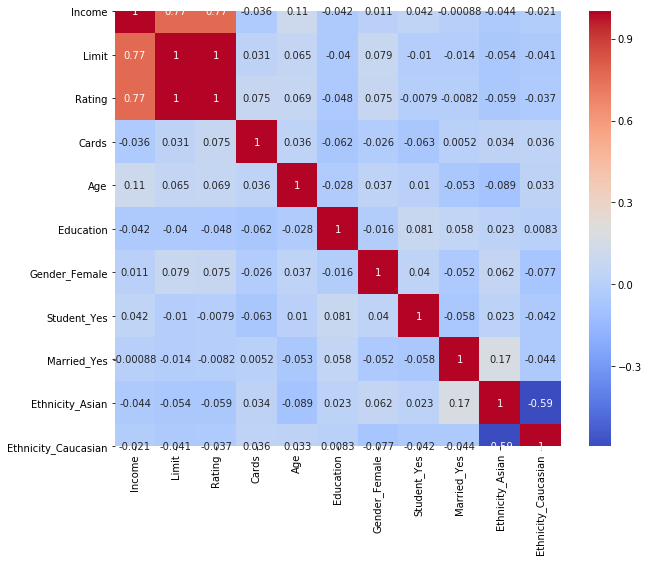

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

### Using VIF

In [50]:
x = X_constant
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({"VIF":vif}, index=x.columns).sort_values("VIF", ascending=False)

,VIF
Rating,215.785202
Limit,212.792290
const,52.366164
Income,2.585122
Ethnicity_Asian,1.648705
Ethnicity_Caucasian,1.582144
Cards,1.457345
Married_Yes,1.059472
Student_Yes,1.030274
Gender_Female,1.027671


We can remove the columns with high VIF values and check the collinearity again. 

In [51]:
x.drop(columns=['Limit'],inplace=True)
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({"VIF":vif}, index=x.columns).sort_values("VIF", ascending=False)

,VIF
const,45.901968
Rating,2.605937
Income,2.585060
Ethnicity_Asian,1.636611
Ethnicity_Caucasian,1.581891
Cards,1.047380
Married_Yes,1.046665
Age,1.026992
Gender_Female,1.026747
Student_Yes,1.022600


Of the candidates most of them are not having high VIF and we cannot drop Rating because it is an important decision factor so we will drop constant (with a high VIF).

In [47]:
candidates

['Education',
 'Ethnicity_Caucasian',
 'Married_Yes',
 'Rating',
 'Age',
 'Gender_Female',
 'Ethnicity_Asian']

### Improving model by removing the collinear features

In [54]:
ols = sm.OLS(y_train,x).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Balance   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              736.3
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                   1.50e-189
Time:                        12:08:25   Log-Likelihood:                         -1761.6
No. Observations:                 280   AIC:                                      3543.
Df Residuals:                     270   BIC:                                      3580.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income                 -7.3001      0.368    -19.860      0.000      -8.024      -6.576
Rating                  3.7113      0.081     45.716      0.000       3.551       3.871
Cards                 -12.6198      5.593     -2.256      0.025     -23.632      -1.608
Age                    -2.6846      0.413     -6.508      0.000      -3.497      -1.872
Education             -17.3537      1.941     -8.943      0.000     -21.174     -13.533
Gender_Female         -36.7495     15.992     -2.298      0.022     -68.235      -5.264
Student_Yes           398.5058     24.924     15.989      0.000     349.435     447.577
Married_Yes           -39.3680     16.395     -2.401      0.017     -71.647      -7.089
Ethnicity_Asian       -27.8689     22.231     -1.254      0.211     -71.636      15.898
Ethnicity_Caucasian   -45.8757     19.402     -2.364      0.019     -84.074      -7.678
==============================================================================
Omnibus:                        5.762   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                3.450
Skew:                          -0.007   Prob(JB):                        0.178
Kurtosis:                       2.456   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Metrics 

#### We can get the r2 and adjusted r2 using the summary funtion in OLS

We can see the change in r2 adn adjusted r2 square from the above summary (it has improved), we can improve further by dropping and checking again.

#### RMSE

In [62]:
predictions = ols.predict(X_test.drop(columns=['Limit']))
print('RMSE')
mean_squared_error(y_test,predictions) ** 0.5

RMSE


127.61722177000345